# Viewing a heatmap

Let's go back to _house pricing.csv_, and try to do a little of what is commonly called :  *feature engineering*

1. Import usual librairies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

2. Import the dataset named house_pricing.csv. Cut out the dataset to keep only the last 15 columns.

In [18]:
df = pd.read_csv("house_pricing.csv")

In [3]:
# for idx,column in enumerate(df.columns):
#     print(idx,column)

0 Id
1 MSSubClass
2 MSZoning
3 LotFrontage
4 LotArea
5 Street
6 Alley
7 LotShape
8 LandContour
9 Utilities
10 LotConfig
11 LandSlope
12 Neighborhood
13 Condition1
14 Condition2
15 BldgType
16 HouseStyle
17 OverallQual
18 OverallCond
19 YearBuilt
20 YearRemodAdd
21 RoofStyle
22 RoofMatl
23 Exterior1st
24 Exterior2nd
25 MasVnrType
26 MasVnrArea
27 ExterQual
28 ExterCond
29 Foundation
30 BsmtQual
31 BsmtCond
32 BsmtExposure
33 BsmtFinType1
34 BsmtFinSF1
35 BsmtFinType2
36 BsmtFinSF2
37 BsmtUnfSF
38 TotalBsmtSF
39 Heating
40 HeatingQC
41 CentralAir
42 Electrical
43 1stFlrSF
44 2ndFlrSF
45 LowQualFinSF
46 GrLivArea
47 BsmtFullBath
48 BsmtHalfBath
49 FullBath
50 HalfBath
51 BedroomAbvGr
52 KitchenAbvGr
53 KitchenQual
54 TotRmsAbvGrd
55 Functional
56 Fireplaces
57 FireplaceQu
58 GarageType
59 GarageYrBlt
60 GarageFinish
61 GarageCars
62 GarageArea
63 GarageQual
64 GarageCond
65 PavedDrive
66 WoodDeckSF
67 OpenPorchSF
68 EnclosedPorch
69 3SsnPorch
70 ScreenPorch
71 PoolArea
72 PoolQC
73 Fence


In [19]:
df = df.iloc[:, -15:]
df

,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [20]:
df.head()

,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   WoodDeckSF     1460 non-null   int64 
 1   OpenPorchSF    1460 non-null   int64 
 2   EnclosedPorch  1460 non-null   int64 
 3   3SsnPorch      1460 non-null   int64 
 4   ScreenPorch    1460 non-null   int64 
 5   PoolArea       1460 non-null   int64 
 6   PoolQC         7 non-null      object
 7   Fence          281 non-null    object
 8   MiscFeature    54 non-null     object
 9   MiscVal        1460 non-null   int64 
 10  MoSold         1460 non-null   int64 
 11  YrSold         1460 non-null   int64 
 12  SaleType       1460 non-null   object
 13  SaleCondition  1460 non-null   object
 14  SalePrice      1460 non-null   int64 
dtypes: int64(10), object(5)
memory usage: 171.2+ KB


In [45]:
df.describe(include="all")

,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


3. Create a correlation matrix with all dataset's variables

In [9]:
corr = df.corr(numeric_only=True)
corr

,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
WoodDeckSF,1.000000,0.058661,-0.125989,-0.032771,-0.074181,0.073378,-0.009551,0.021011,0.022270,0.324413
OpenPorchSF,0.058661,1.000000,-0.093079,-0.005842,0.074304,0.060762,-0.018584,0.071255,-0.057619,0.315856
EnclosedPorch,-0.125989,-0.093079,1.000000,-0.037305,-0.082864,0.054203,0.018361,-0.028887,-0.009916,-0.128578
3SsnPorch,-0.032771,-0.005842,-0.037305,1.000000,-0.031436,-0.007992,0.000354,0.029474,0.018645,0.044584
ScreenPorch,-0.074181,0.074304,-0.082864,-0.031436,1.000000,0.051307,0.031946,0.023217,0.010694,0.111447
PoolArea,0.073378,0.060762,0.054203,-0.007992,0.051307,1.000000,0.029669,-0.033737,-0.059689,0.092404
MiscVal,-0.009551,-0.018584,0.018361,0.000354,0.031946,0.029669,1.000000,-0.006495,0.004906,-0.021190
MoSold,0.021011,0.071255,-0.028887,0.029474,0.023217,-0.033737,-0.006495,1.000000,-0.145721,0.046432
YrSold,0.022270,-0.057619,-0.009916,0.018645,0.010694,-0.059689,0.004906,-0.145721,1.000000,-0.028923
SalePrice,0.324413,0.315856,-0.128578,0.044584,0.111447,0.092404,-0.021190,0.046432,-0.028923,1.000000


4. Create a heatmap with differentes correlations values

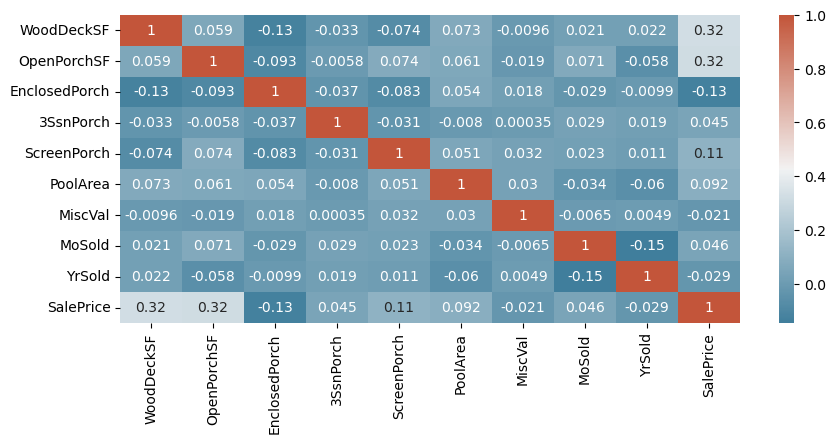

In [26]:
plt.subplots(figsize=(10, 4))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, cmap=cmap)
plt.show()

<Axes: >

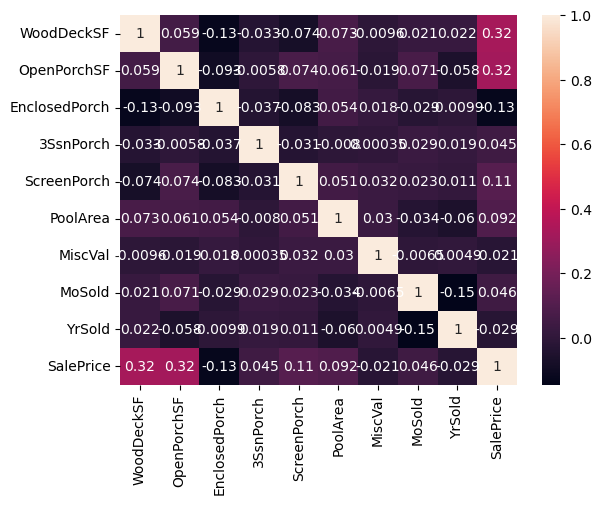

In [11]:
sns.heatmap(corr, annot=True)

5. What is the top 3 features we should keep to predict SalePrice ?

In [16]:
corr["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
WoodDeckSF       0.324413
OpenPorchSF      0.315856
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
MiscVal         -0.021190
YrSold          -0.028923
EnclosedPorch   -0.128578
Name: SalePrice, dtype: float64